# Introdução

No contexto da indústria moderna, a manutenção eficiente de equipamentos é crucial para garantir a produtividade, reduzir custos e evitar paradas inesperadas na produção. Tradicionalmente, a manutenção é realizada de forma reativa ou preventiva, mas essas abordagens podem resultar em desperdício de recursos ou falhas inesperadas.

Com o avanço da Internet das Coisas (IoT) e da análise de dados, tornou-se possível coletar informações detalhadas de sensores instalados em máquinas, permitindo o desenvolvimento de sistemas inteligentes de manutenção preditiva. Esses sistemas utilizam algoritmos de aprendizado de máquina para analisar dados históricos e identificar padrões que precedem falhas, possibilitando intervenções mais assertivas e eficientes.

 ## Objetivo principal:
 
 Criar um sistema inteligente capaz de prever falhas em máquinas a partir de dados IoT e identificar o tipo de defeito.
    
- **Entradas:**

  - Medições de 8 atributos de cada máquina.
    
- **Saídas esperadas:**
    
    - Classe do defeito (uma das 5 possíveis).
        
    - Probabilidade associada à previsão.
        
    - Relatórios e visualizações de insights operacionais e falhas.

## Descrição dos Dados 



|     | Campo                           | Descrição                                                                                 |
| --- | ------------------------------- | ----------------------------------------------------------------------------------------- |
| 0   | id                              | Identificador das amostras do banco.                                                      |
| 1   | id_produto                      | Identificador único do produto. Combinação da variável Tipo e um número de identificação. |
| 2   | tipo                            | Tipo de produto/máquina (L/M/H).                                                          |
| 3   | temperatura_ar                  | Temperatura do ar no ambiente (K).                                                        |
| 4   | temperatura_processo            | Temperatura do processo (K).                                                              |
| 5   | umidade_relativa                | Umidade relativa do ar (%).                                                               |
| 6   | velocidade_rotacional           | Velocidade rotacional da máquina em rotações por minutos (RPM).                           |
| 7   | torque                          | Torque da máquina em Nm.                                                                  |
| 8   | desgaste_da_ferramenta          | Duração do uso da ferramenta em minutos.                                                  |
| 9   | falha_maquina                   | Indica se houve falha na máquina (1) ou não (0).                                          |
| 10  | FDF (Falha Desgaste Ferramenta) | Indica se houve falha por desgaste da ferramenta (1) ou não (0).                          |
| 11  | FDC (Falha Dissipacao Calor)    | Indica se houve falha por dissipação de calor (1) ou não (0).                             |
| 12  | FP (Falha Potencia)             | Indica se houve falha por potência (1) ou não (0).                                        |
| 13  | FTE (Falha Tensao Excessiva)    | Indica se houve falha por tensão excessiva (1) ou não (0).                                |
| 14  | FA (Falha Aleatoria)            | Indica se houve falha aleatória (1) ou não (0).                                           |


## Configuração 

In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install plotly

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

In [3]:
pio.renderers.default = "notebook"

# **Exploratory Data Analysis - EDA (Análise Exploratória de Dados)**

## Carregando os Dados 

In [4]:
df = pd.read_csv('dataset/bootcamp_train.csv', index_col=0)

## Pré-visualização

Objetivo é visualizar como todo.

In [5]:
df.head()

,id_produto,tipo,temperatura_ar,temperatura_processo,umidade_relativa,velocidade_rotacional,torque,desgaste_da_ferramenta,falha_maquina,FDF (Falha Desgaste Ferramenta),FDC (Falha Dissipacao Calor),FP (Falha Potencia),FTE (Falha Tensao Excessiva),FA (Falha Aleatoria)
id,,,,,,,,,,,,,,
0,L56434,L,298.3,309.1,90.0,1616.0,31.1,195.0,não,False,False,Não,False,Não
1,L48741,L,298.2,308.4,90.0,1388.0,53.8,137.0,Não,False,False,Não,False,Não
2,L48850,L,298.2,307.8,90.0,1528.0,31.1,NaN,Não,N,False,Não,False,Não
3,M20947,M,300.9,310.8,90.0,1599.0,33.0,7.0,não,False,False,Não,False,não
4,L53849,L,-36.0,310.5,90.0,1571.0,33.9,NaN,não,N,False,não,False,Não


In [6]:
df.shape

(35260, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35260 entries, 0 to 35259
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id_produto                       35260 non-null  object 
 1   tipo                             35260 non-null  object 
 2   temperatura_ar                   34644 non-null  float64
 3   temperatura_processo             34661 non-null  float64
 4   umidade_relativa                 35260 non-null  float64
 5   velocidade_rotacional            34509 non-null  float64
 6   torque                           34637 non-null  float64
 7   desgaste_da_ferramenta           34308 non-null  float64
 8   falha_maquina                    35260 non-null  object 
 9   FDF (Falha Desgaste Ferramenta)  35260 non-null  object 
 10  FDC (Falha Dissipacao Calor)     35260 non-null  object 
 11  FP (Falha Potencia)              35260 non-null  object 
 12  FTE (Falha Tensao Exces

In [8]:
df.describe()

,temperatura_ar,temperatura_processo,umidade_relativa,velocidade_rotacional,torque,desgaste_da_ferramenta
count,34644.000000,34661.000000,35260.000000,34509.000000,34637.000000,34308.000000
mean,269.535241,280.457676,89.997672,1380.194181,40.210357,74.373266
std,96.342224,96.943630,0.142191,494.098759,8.831626,110.411937
min,-36.000000,-38.000000,80.590429,-161.000000,3.800000,-202.000000
25%,297.900000,308.500000,90.000000,1408.000000,34.300000,28.000000
50%,299.600000,309.800000,90.000000,1483.000000,40.300000,94.000000
75%,301.100000,310.900000,90.000000,1574.000000,46.200000,155.000000
max,304.500000,313.800000,94.575256,2886.000000,76.600000,253.000000


In [9]:
df.columns

Index(['id_produto', 'tipo', 'temperatura_ar', 'temperatura_processo',
       'umidade_relativa', 'velocidade_rotacional', 'torque',
       'desgaste_da_ferramenta', 'falha_maquina',
       'FDF (Falha Desgaste Ferramenta)', 'FDC (Falha Dissipacao Calor)',
       'FP (Falha Potencia)', 'FTE (Falha Tensao Excessiva)',
       'FA (Falha Aleatoria)'],
      dtype='object')

## Alterando nome da coluna

Verificou-se que alguns nomes de colunas não estavam padronizados. Assim, procedeu-se à sua renomeação para garantir maior consistência e clareza na análise.

In [10]:
renomear_colunas = {
    'FDF (Falha Desgaste Ferramenta)': 'falha_desgaste_ferramenta',
    'FDC (Falha Dissipacao Calor)': 'falha_dissipacao_calor',
    'FP (Falha Potencia)': 'falha_potencia',
    'FTE (Falha Tensao Excessiva)': 'falha_tensao_excessiva',
    'FA (Falha Aleatoria)': 'falha_aleatoria'
}

df = df.rename(columns=renomear_colunas)

df.describe()

,temperatura_ar,temperatura_processo,umidade_relativa,velocidade_rotacional,torque,desgaste_da_ferramenta
count,34644.000000,34661.000000,35260.000000,34509.000000,34637.000000,34308.000000
mean,269.535241,280.457676,89.997672,1380.194181,40.210357,74.373266
std,96.342224,96.943630,0.142191,494.098759,8.831626,110.411937
min,-36.000000,-38.000000,80.590429,-161.000000,3.800000,-202.000000
25%,297.900000,308.500000,90.000000,1408.000000,34.300000,28.000000
50%,299.600000,309.800000,90.000000,1483.000000,40.300000,94.000000
75%,301.100000,310.900000,90.000000,1574.000000,46.200000,155.000000
max,304.500000,313.800000,94.575256,2886.000000,76.600000,253.000000


## Análisando dados faltantes 

In [11]:
print(f"tem valores faltando: {df.isna().any().any()}") 

tem valores faltando: True


In [12]:
print("Valores faltante por coluna ")
df.isna().sum()

Valores faltante por coluna 


id_produto                     0
tipo                           0
temperatura_ar               616
temperatura_processo         599
umidade_relativa               0
velocidade_rotacional        751
torque                       623
desgaste_da_ferramenta       952
falha_maquina                  0
falha_desgaste_ferramenta      0
falha_dissipacao_calor         0
falha_potencia                 0
falha_tensao_excessiva         0
falha_aleatoria                0
dtype: int64

In [13]:
print("Valores faltante por coluna %")
percentual = df.isna().sum() / df.shape[0] * 100
print(percentual.round(2))

Valores faltante por coluna %
id_produto                   0.00
tipo                         0.00
temperatura_ar               1.75
temperatura_processo         1.70
umidade_relativa             0.00
velocidade_rotacional        2.13
torque                       1.77
desgaste_da_ferramenta       2.70
falha_maquina                0.00
falha_desgaste_ferramenta    0.00
falha_dissipacao_calor       0.00
falha_potencia               0.00
falha_tensao_excessiva       0.00
falha_aleatoria              0.00
dtype: float64


In [14]:
df_clean = df.dropna() 
print(f"A representaividade dos dados faltantes: {(1 - df_clean.shape[0]/df.shape[0])*100:.2f}%")

A representaividade dos dados faltantes: 9.65%


**Conclusão:** Como o valor é maior que **5%** não será possível eliminar diretamente. Não existe colunas que tem porcentagem significativo com valores faltante que possa ser eliminado. 

## **Análise Univariada**

O objetivo é examinar cada coluna individualmente para:

- Identificar inconsistências nos dados;
- Tratar valores ausentes;
- Detectar e lidar com outliers.

### ID Produto 

In [15]:
contagem  = df["id_produto"].value_counts()
contagem

id_produto
L53255    31
L53257    30
L53271    28
L55983    28
L54272    28
          ..
L55634     1
M21993     1
M22136     1
L56385     1
L47817     1
Name: count, Length: 9708, dtype: int64

In [16]:
print(f'Quantidade distintos: {df["id_produto"].nunique()}')

Quantidade distintos: 9708


In [17]:
valores = list(range(32))
quantidades = [(contagem == i).sum() for i in valores]

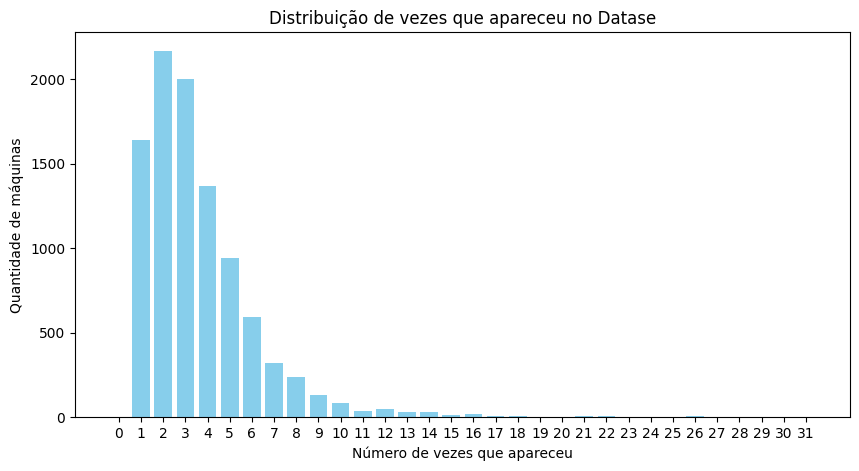

In [18]:
plt.figure(figsize=(10,5))
plt.bar(valores, quantidades, color='skyblue')
plt.xlabel("Número de vezes que apareceu")
plt.ylabel("Quantidade de máquinas")
plt.title("Distribuição de vezes que apareceu no Datase")
plt.xticks(valores)
plt.show()

### Tipo

A coluna **tipo** mostrou consistente já que esperamos que tivesse somente trẽs tipos de valores.

In [19]:
df["tipo"].value_counts()

tipo
L    23855
M     8799
H     2606
Name: count, dtype: int64

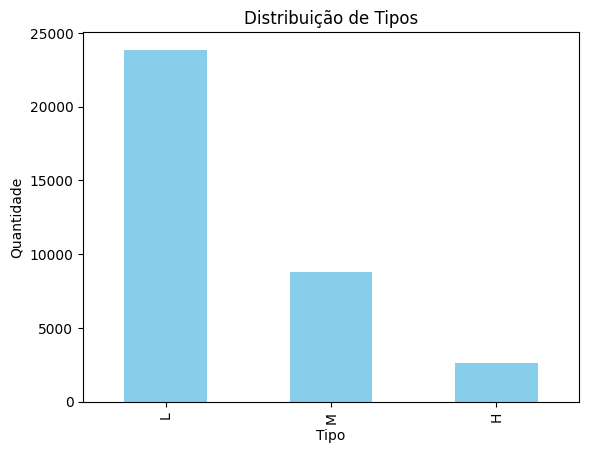

In [20]:
df["tipo"].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel("Tipo")
plt.ylabel("Quantidade")
plt.title("Distribuição de Tipos")
plt.show()

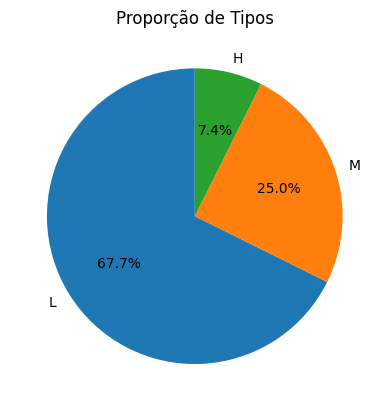

In [21]:
df["tipo"].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Proporção de Tipos")
plt.ylabel("")
plt.show()


### Temperatura do AR

In [22]:
# Transforma em celsius 
df["temperatura_ar"]  = df["temperatura_ar"] - 273.15
df["temperatura_ar"].describe()

count    34644.000000
mean        -3.614759
std         96.342224
min       -309.150000
25%         24.750000
50%         26.450000
75%         27.950000
max         31.350000
Name: temperatura_ar, dtype: float64

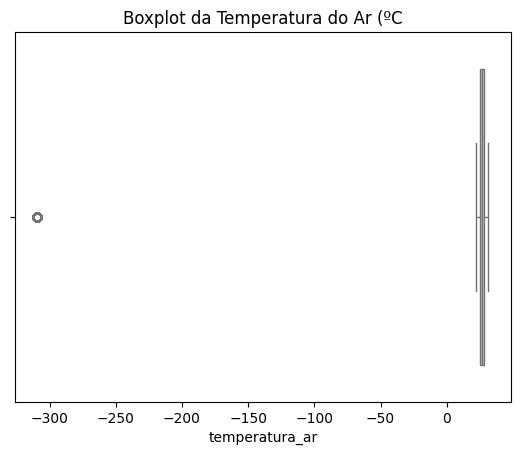

In [23]:
sns.boxplot(x=df["temperatura_ar"] , color='lightgreen')
plt.title("Boxplot da Temperatura do Ar (ºC")
plt.show()

**Obs:** Não faz sentindo o valor da temperatura mímina ser <-309 ºC, Além disso, esse valor é um outliers

In [24]:
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    return df[(df[col] >= lim_inf) & (df[col] <= lim_sup)]


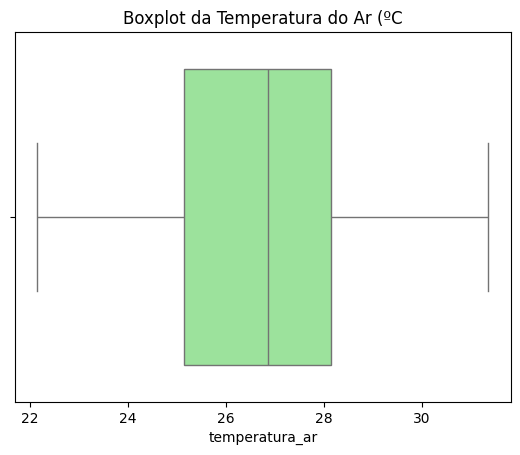

In [25]:
# Removendo Outliers

df = remove_outliers_iqr(df, "temperatura_ar")
sns.boxplot(x=df["temperatura_ar"] , color='lightgreen')
plt.title("Boxplot da Temperatura do Ar (ºC")
plt.show()

In [26]:
# Substituir valores ausentes pela media
df.fillna({'temperatura_ar': df['temperatura_ar'].mean()}, inplace=True)

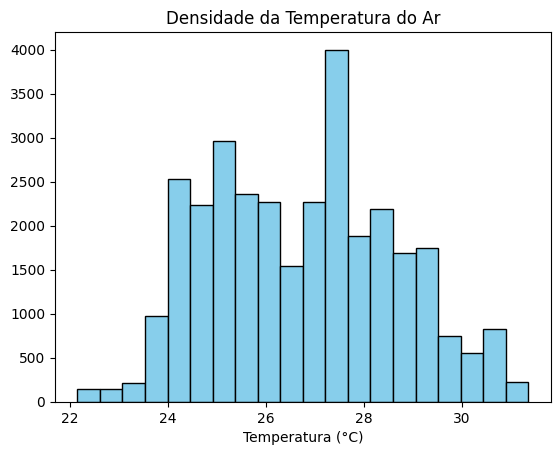

In [27]:
plt.hist(df['temperatura_ar'], bins=20, edgecolor='black', color='skyblue')
plt.title("Densidade da Temperatura do Ar")
plt.xlabel("Temperatura (°C)")
plt.show()

**Conclusão:** Ao retirar outliers os dados ser tornou mais coerente

### Temperatuda do Processo 


In [28]:
# Transforma em celsius para facilitar o entendimento 
df["temperatura_processo"]  = df["temperatura_processo"] - 273.15
df["temperatura_processo"].describe()

count    30972.000000
mean         7.558498
std         96.571498
min       -311.150000
25%         35.350000
50%         36.650000
75%         37.750000
max         40.650000
Name: temperatura_processo, dtype: float64

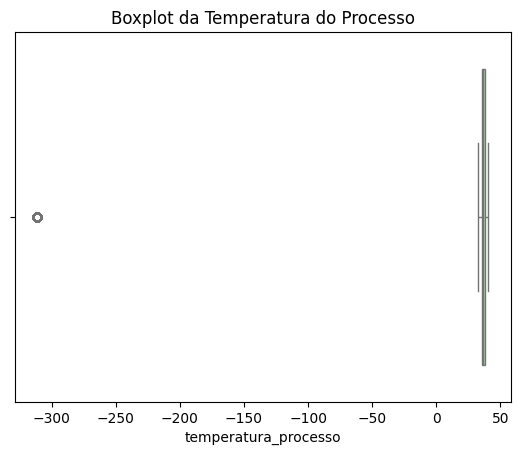

In [29]:
sns.boxplot(x=df["temperatura_processo"] , color='lightgreen')
plt.title("Boxplot da Temperatura do Processo")
plt.show()

Analogo a temperatuda do ar.

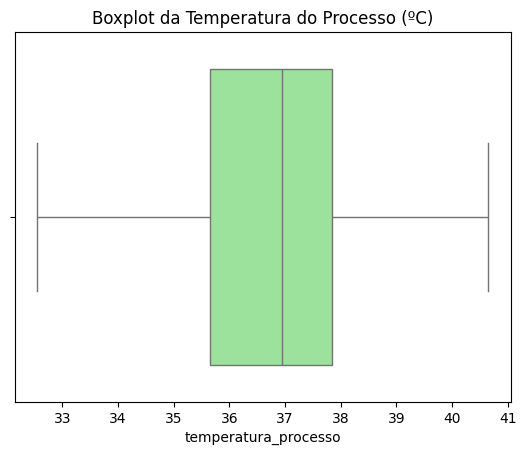

In [30]:
df = remove_outliers_iqr(df, "temperatura_processo")

sns.boxplot(x=df["temperatura_processo"], color='lightgreen')
plt.title("Boxplot da Temperatura do Processo (ºC)")
plt.show()

In [31]:
# Iremos adicionar o valor da média para os valores faltantes 
df.fillna({'temperatura_processo': df['temperatura_processo'].mean()}, inplace=True)

In [32]:
df['temperatura_processo'].describe()

count    28368.000000
mean        36.813889
std          1.406336
min         32.550000
25%         35.650000
50%         36.950000
75%         37.850000
max         40.650000
Name: temperatura_processo, dtype: float64

**Conclusão:**  Foi analogo a temperatura do ar, ou seja, após eliminar o outliers os dados se tornaram mais coerente. 

### Umidade Relativa

Esta de acordo com esperado que seria os valores entre 0 a 100.

In [33]:
df['umidade_relativa'].describe()

count    28368.0
mean        90.0
std          0.0
min         90.0
25%         90.0
50%         90.0
75%         90.0
max         90.0
Name: umidade_relativa, dtype: float64

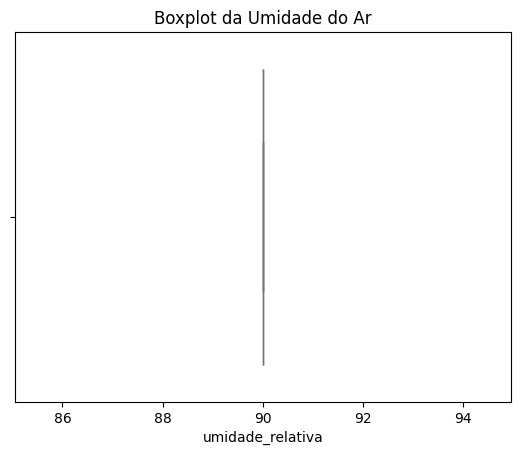

In [34]:
sns.boxplot(x=df['umidade_relativa'], color='lightgreen')
plt.title("Boxplot da Umidade do Ar")
plt.show()

**Obs:**  Os valores estão quase sempre **constante a 90%**. Por esse motivo vamos eliminar da nossa analise 

In [76]:
df = df.drop(columns=["umidade_relativa"])

### Velocidade Rotacional

In [35]:
df['velocidade_rotacional'].describe()

count    27784.000000
mean      1380.350453
std        493.642075
min       -161.000000
25%       1408.000000
50%       1483.000000
75%       1574.000000
max       2886.000000
Name: velocidade_rotacional, dtype: float64

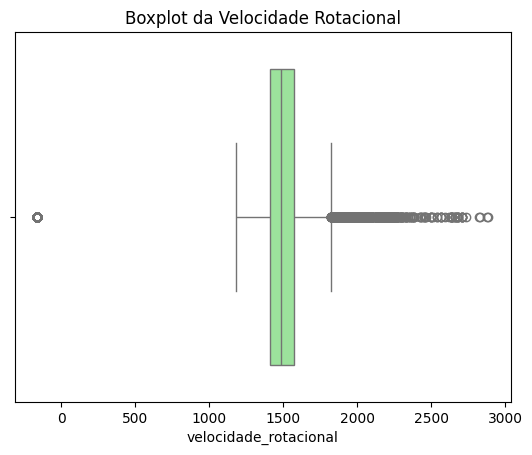

In [36]:
sns.boxplot(x=df['velocidade_rotacional'], color='lightgreen')
plt.title("Boxplot da Velocidade Rotacional")
plt.show()

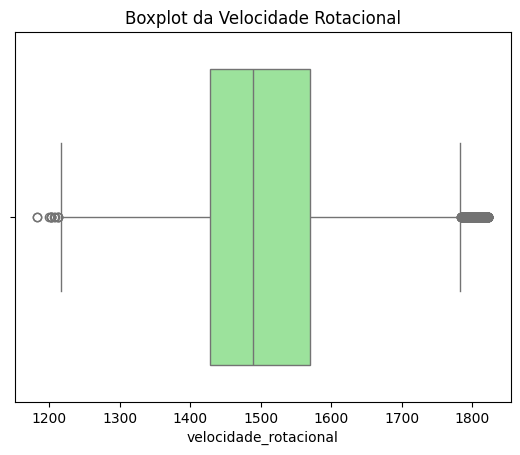

In [37]:
df = remove_outliers_iqr(df, "velocidade_rotacional")
sns.boxplot(x=df['velocidade_rotacional'], color='lightgreen')
plt.title("Boxplot da Velocidade Rotacional")
plt.show()

In [38]:
# substituir por media os valores ausentes  
df.fillna({'velocidade_rotacional': df['velocidade_rotacional'].mean()}, inplace=True)
df['velocidade_rotacional'].describe()

count    24382.000000
mean      1505.370601
std        111.412482
min       1183.000000
25%       1428.000000
50%       1489.000000
75%       1570.000000
max       1823.000000
Name: velocidade_rotacional, dtype: float64

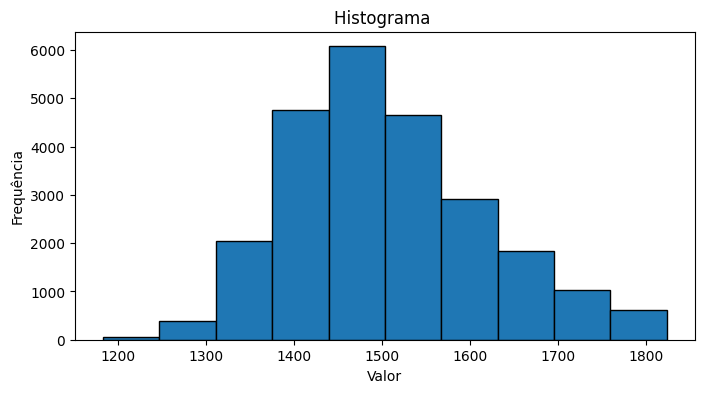

In [39]:
# Histograma
plt.figure(figsize=(8,4))
plt.hist( df['velocidade_rotacional'], bins=10, edgecolor='black')
plt.title("Histograma ")
plt.xlabel("Valor")
plt.ylabel("Frequência")
plt.show()

### Toque 

In [40]:
 df['torque'].describe()

count    23971.000000
mean        41.005629
std          8.110763
min          9.700000
25%         35.200000
50%         40.800000
75%         46.500000
max         76.600000
Name: torque, dtype: float64

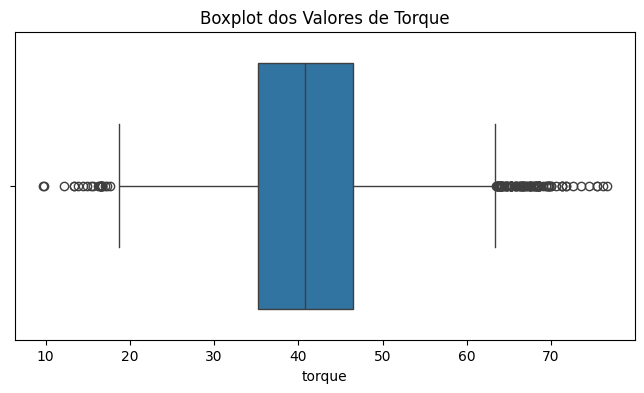

In [41]:
plt.figure(figsize=(8,4))
sns.boxplot(x= df['torque'])
plt.title("Boxplot dos Valores de Torque")
plt.show()



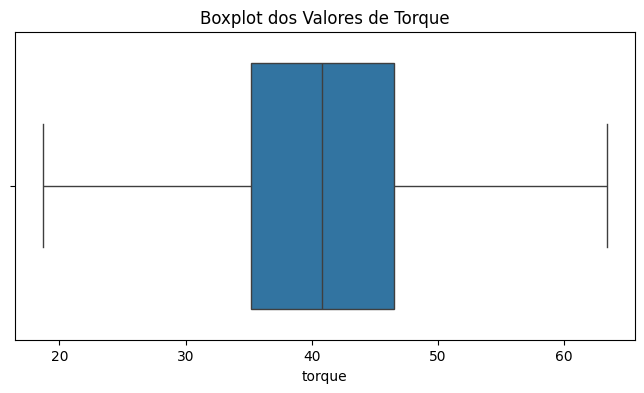

In [42]:
df = remove_outliers_iqr(df, "torque")

plt.figure(figsize=(8,4))
sns.boxplot(x= df['torque'])
plt.title("Boxplot dos Valores de Torque")
plt.show()



In [43]:
df.fillna({'torque': df['torque'].mean()}, inplace=True)
df['torque'].describe()

count    23845.000000
mean        40.917200
std          7.903608
min         18.700000
25%         35.200000
50%         40.800000
75%         46.500000
max         63.400000
Name: torque, dtype: float64

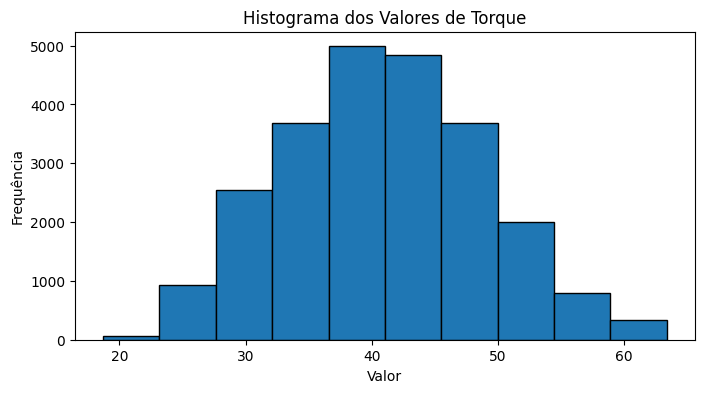

In [44]:
# Histograma
plt.figure(figsize=(8,4))
plt.hist( df['torque'], bins=10, edgecolor='black')
plt.title("Histograma dos Valores de Torque")
plt.xlabel("Valor")
plt.ylabel("Frequência")
plt.show()

### Desgaste da ferramenta

In [45]:
df['desgaste_da_ferramenta'].describe()

count    23212.000000
mean        75.093098
std        109.416080
min       -202.000000
25%         29.000000
50%         94.000000
75%        155.000000
max        253.000000
Name: desgaste_da_ferramenta, dtype: float64

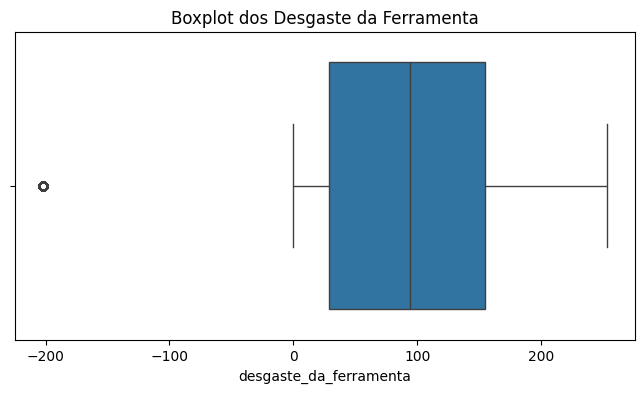

In [46]:
plt.figure(figsize=(8,4))
sns.boxplot(x= df['desgaste_da_ferramenta'])
plt.title("Boxplot dos Desgaste da Ferramenta")
plt.show()

Não faz sentido tempo negativo. Além de ser outliers.

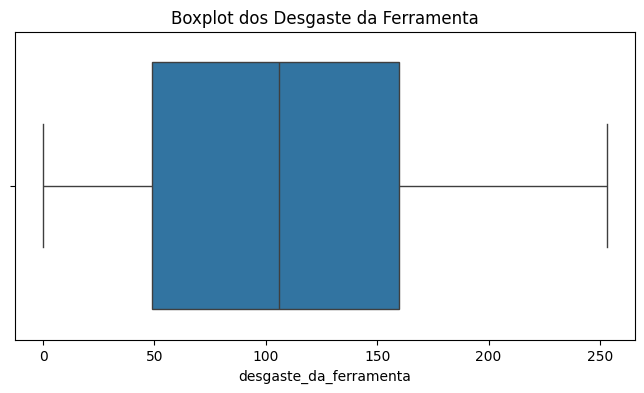

In [47]:
df = remove_outliers_iqr(df, "desgaste_da_ferramenta")
plt.figure(figsize=(8,4))
sns.boxplot(x= df['desgaste_da_ferramenta'])
plt.title("Boxplot dos Desgaste da Ferramenta")
plt.show()

In [48]:
# substituir por media 
df.fillna({'desgaste_da_ferramenta': df['desgaste_da_ferramenta'].mean()}, inplace=True)
df['desgaste_da_ferramenta'].describe()

count    20954.000000
mean       104.952610
std         64.001059
min          0.000000
25%         49.000000
50%        106.000000
75%        160.000000
max        253.000000
Name: desgaste_da_ferramenta, dtype: float64

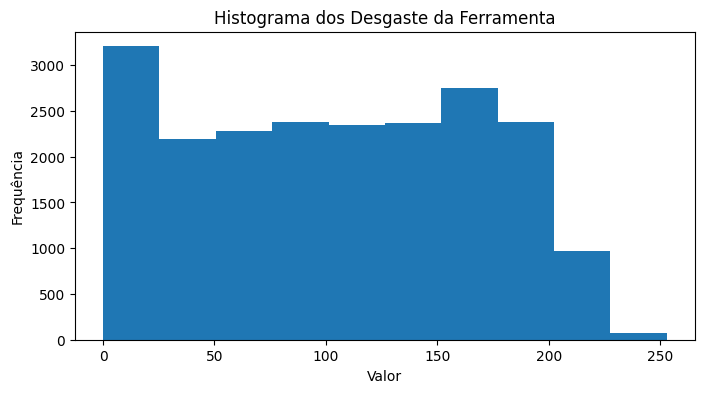

In [49]:
# Histograma
plt.figure(figsize=(8,4))
plt.hist( df['desgaste_da_ferramenta'], bins=10)
plt.title("Histograma dos Desgaste da Ferramenta")
plt.xlabel("Valor")
plt.ylabel("Frequência")
plt.show()

### Falha maquina

In [50]:
def padronizar_falha(series):
    s = series.astype(str).str.lower().str.strip()
    mapa = {
        "false": 0, "f": 0, "n": 0, "0": 0, "nao": 0, "não": 0, "-": 0,
        "true": 1, "t": 1, "s": 1, "y": 1, "yes": 1, "1": 1, "sim": 1
    }
    return s.map(mapa).fillna(0).astype(int)


In [51]:
df['falha_maquina'].value_counts()

falha_maquina
Não    13068
não     6749
N        414
0        407
Sim      196
sim      109
1          7
y          4
Name: count, dtype: int64

como visto há despadronização no dados.

In [52]:
df["falha_maquina"] = padronizar_falha(df["falha_maquina"])

# Confere resultado
print(df['falha_maquina'].value_counts())

falha_maquina
0    20638
1      316
Name: count, dtype: int64


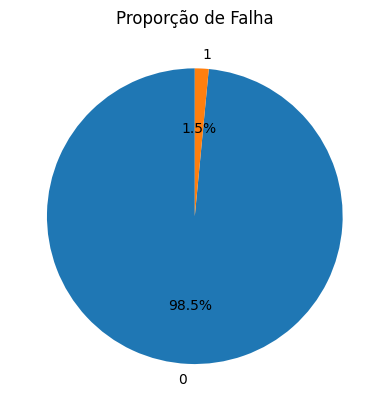

In [53]:
df["falha_maquina"].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Proporção de Falha")
plt.ylabel("")
plt.show()

### Falha Desgaste Ferramenta

In [54]:
df['falha_desgaste_ferramenta'].value_counts()

falha_desgaste_ferramenta
False    20092
0          399
N          389
True        41
-           32
1            1
Name: count, dtype: int64

In [55]:
df["falha_desgaste_ferramenta"] = padronizar_falha(df["falha_desgaste_ferramenta"])
df['falha_desgaste_ferramenta'].value_counts()

falha_desgaste_ferramenta
0    20912
1       42
Name: count, dtype: int64

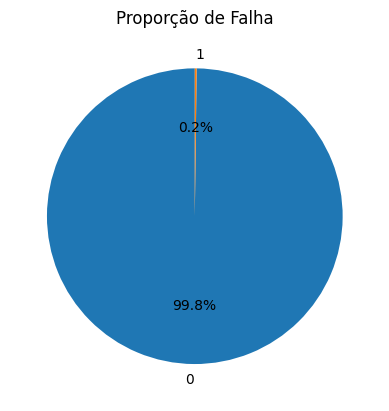

In [56]:
df['falha_desgaste_ferramenta'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Proporção de Falha")
plt.ylabel("")
plt.show()

### Falha dissipacao calor

In [57]:
df['falha_dissipacao_calor'].value_counts()

falha_dissipacao_calor
False    20023
nao        404
0          390
True       133
y            2
1            2
Name: count, dtype: int64

In [58]:
df['falha_dissipacao_calor'] = padronizar_falha(df['falha_dissipacao_calor'])
df['falha_dissipacao_calor'].value_counts()

falha_dissipacao_calor
0    20817
1      137
Name: count, dtype: int64

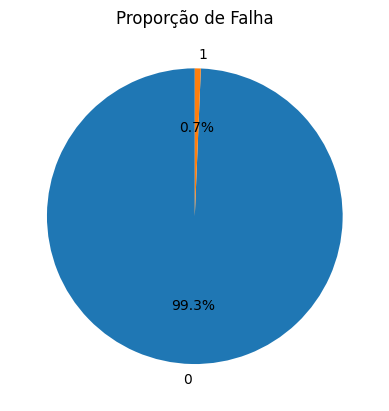

In [59]:
df['falha_dissipacao_calor'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Proporção de Falha")
plt.ylabel("")
plt.show()

### Falha Potencia

In [60]:
df['falha_potencia'].value_counts()

falha_potencia
Não    13386
não     6749
N        430
0        377
Sim        7
sim        5
Name: count, dtype: int64

In [61]:
df['falha_potencia'] = padronizar_falha(df['falha_potencia'])
df['falha_potencia'].value_counts()

falha_potencia
0    20942
1       12
Name: count, dtype: int64

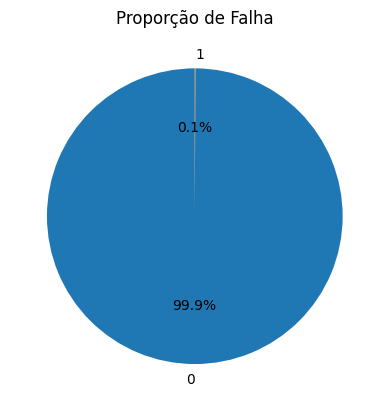

In [62]:
df['falha_potencia'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Proporção de Falha")
plt.ylabel("")
plt.show()

### Falha Tensão Excessiva

In [63]:
df[ 'falha_tensao_excessiva'].value_counts()

falha_tensao_excessiva
False    20871
True        83
Name: count, dtype: int64

In [64]:
df['falha_tensao_excessiva'] = padronizar_falha(df['falha_tensao_excessiva'])
df['falha_tensao_excessiva'].value_counts()

falha_tensao_excessiva
0    20871
1       83
Name: count, dtype: int64

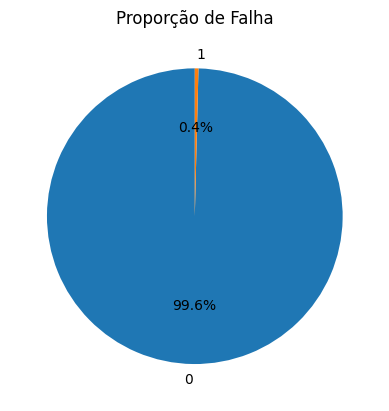

In [65]:
df['falha_tensao_excessiva'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Proporção de Falha")
plt.ylabel("")
plt.show()

### Falha Aleatória

In [66]:
df['falha_aleatoria'].value_counts()

falha_aleatoria
Não    13501
não     6984
0        391
Sim       33
-         32
sim       12
1          1
Name: count, dtype: int64

In [67]:
df['falha_aleatoria'] = padronizar_falha(df['falha_aleatoria'])
df['falha_aleatoria'].value_counts()

falha_aleatoria
0    20908
1       46
Name: count, dtype: int64

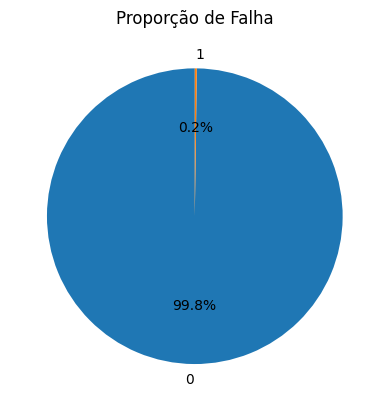

In [68]:
df['falha_aleatoria'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Proporção de Falha")
plt.ylabel("")
plt.show()

## Salvando o resultado

In [69]:
df['delta_temperatura'] = df['temperatura_ar'] - df ['temperatura_processo']
df['potencia'] = df['torque'] * df['velocidade_rotacional']

In [70]:
print(f"tem valores faltando: {df.isna().any().any()}") 

tem valores faltando: False


In [71]:
# Lista de falhas específicas
falhas = [
    "falha_desgaste_ferramenta",  # FDF
    "falha_dissipacao_calor",     # FDC
    "falha_potencia",             # FP
    "falha_tensao_excessiva",     # FTE
    "falha_aleatoria"             # FA
]

# Remover linhas incoerentes (onde falha_maquina != max das falhas específicas)
df_limpo = df[df["falha_maquina"] == df[falhas].max(axis=1)]

print("Tamanho original:", len(df))
print("Tamanho após remoção de inconsistências:", len(df_limpo))

Tamanho original: 20954
Tamanho após remoção de inconsistências: 20857


In [72]:
df_limpo.to_csv("outputs/dataset_limpo.csv", index=False)

## **Análise Multivariada**

### Correlação entres as Falhas

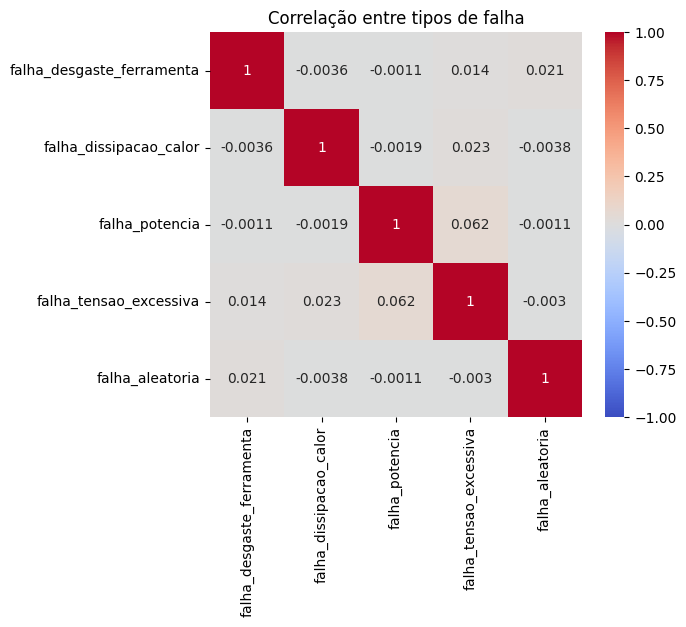

In [73]:
falhas = [
    "falha_desgaste_ferramenta",  # FDF
    "falha_dissipacao_calor",     # FDC
    "falha_potencia",             # FP
    "falha_tensao_excessiva",     # FTE
    "falha_aleatoria"             # FA
]

corr = df[falhas].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlação entre tipos de falha")
plt.show()

**Obs:** Não apresentou nenhuma relação entre si. 

### Correlação Geral

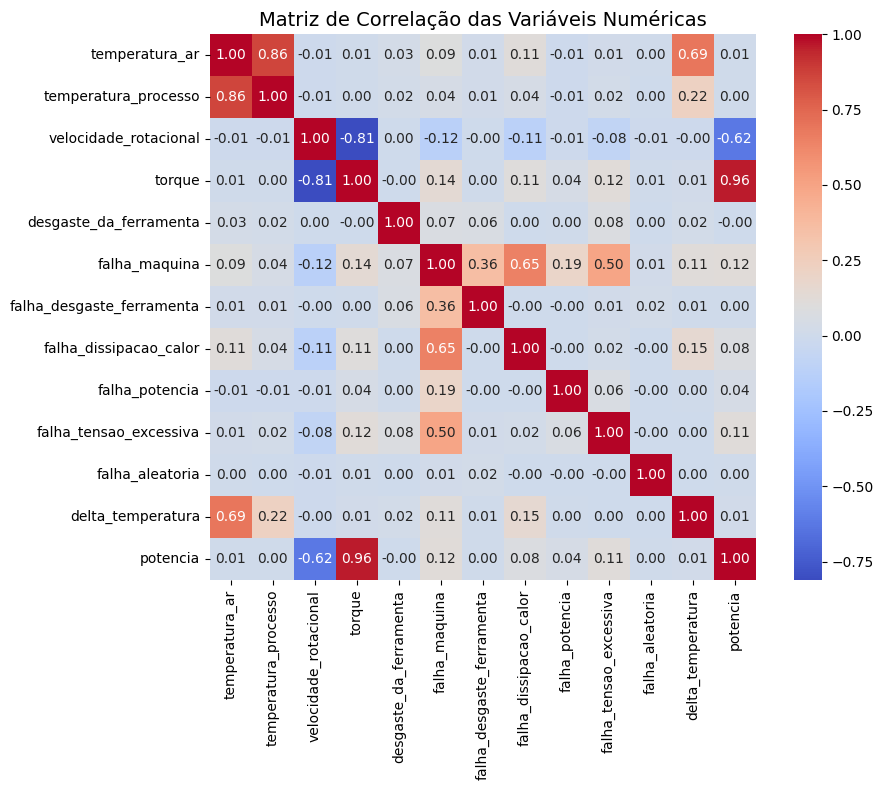

In [77]:
# Selecionar apenas colunas numéricas
num_df = df.select_dtypes(include=['int64','float64'])

# Calcular correlação
corr = num_df.corr()

# Plotar heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=True, square=True)
plt.title("Matriz de Correlação das Variáveis Numéricas", fontsize=14)
plt.tight_layout()
plt.show()

Observações:

- temperatura_ar e temperatura_processo têm correlação forte positiva
- velocidade_rotacional e torque têm correlação forte negativa
- falha_maquina tem correlações moderadas com tipos específicos de falhas (dissipacao_calor, potencia, tensao_excessiva, aleatoria).
- As demais variáveis físicas (umidade, desgaste, etc.) parecem pouco correlacionadas diretamente.

Observações:

- Temperatura do e processo tem correlação positiva;
- Velocidade rotacional e toque tem correlação negativo;
- A umidade do ar mostrou inrrelevante .

### Boxplot 

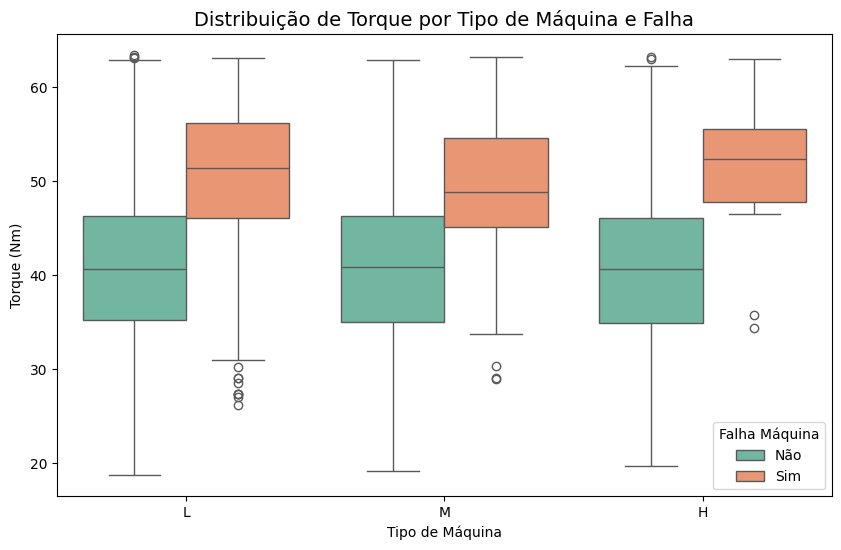

In [678]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df,
    x="tipo",                # categoria (L/M/H)
    y="torque",              # variável contínua
    hue="falha_maquina",     # agora já mapeado para Sim/Não
    palette="Set2"
)

plt.title("Distribuição de Torque por Tipo de Máquina e Falha", fontsize=14)
plt.xlabel("Tipo de Máquina")
plt.ylabel("Torque (Nm)")
plt.legend(title="Falha Maquina")

# Ajusta legenda manualmente
handles, _ = ax.get_legend_handles_labels()
plt.legend(handles, ["Não", "Sim"], title="Falha Máquina")

plt.show()

Podemo ver que pelo grafico que se aumentar drasticamente o Toque a chance da maquina falhar é alto 

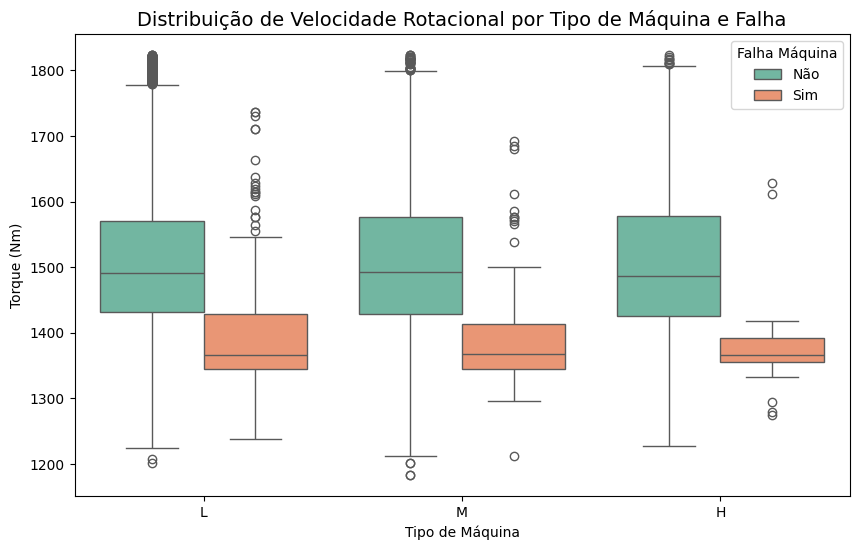

In [679]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(
    data=df,
    x="tipo",                # categoria (L/M/H)
    y="velocidade_rotacional",   # variável contínua
    hue="falha_maquina",     # continua 0/1
    palette="Set2"
)

plt.title("Distribuição de Velocidade Rotacional por Tipo de Máquina e Falha", fontsize=14)
plt.xlabel("Tipo de Máquina")
plt.ylabel("Torque (Nm)")

# Ajusta legenda manualmente
handles, _ = ax.get_legend_handles_labels()
plt.legend(handles, ["Não", "Sim"], title="Falha Máquina")

plt.show()

Podemover que quanto menor a velocidade da rotação maior chance de quebrar.

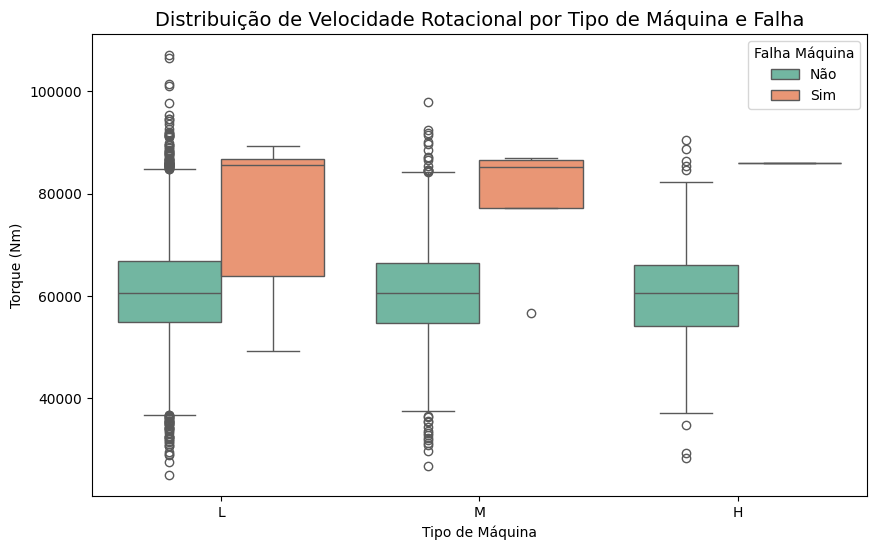

In [687]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(
    data=df,
    x="tipo",                # categoria (L/M/H)
    y="potencia",   # variável contínua
    hue="falha_potencia",     # continua 0/1
    palette="Set2"
)

plt.title("Distribuição de Velocidade Rotacional por Tipo de Máquina e Falha", fontsize=14)
plt.xlabel("Tipo de Máquina")
plt.ylabel("Torque (Nm)")

# Ajusta legenda manualmente
handles, _ = ax.get_legend_handles_labels()
plt.legend(handles, ["Não", "Sim"], title="Falha Máquina")

plt.show()

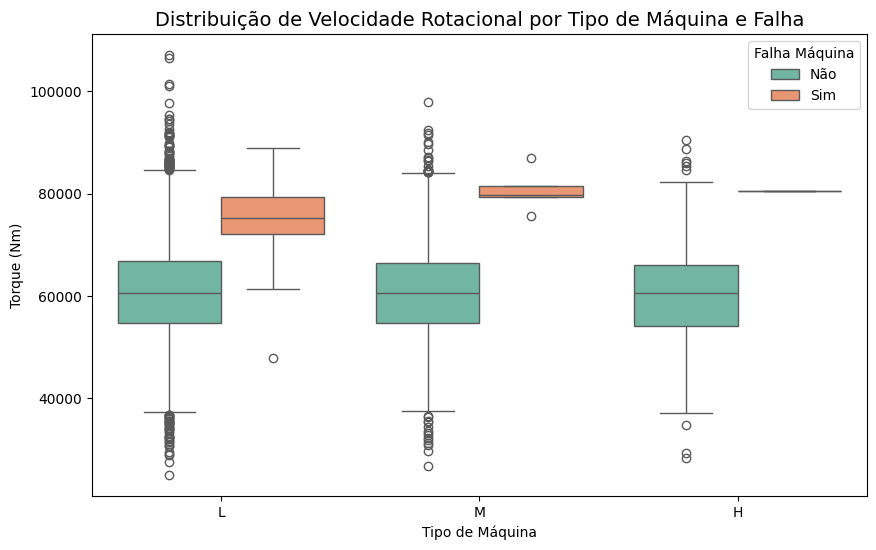

In [688]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(
    data=df,
    x="tipo",                # categoria (L/M/H)
    y="potencia",   # variável contínua
    hue="falha_tensao_excessiva",     # continua 0/1
    palette="Set2"
)

plt.title("Distribuição de Velocidade Rotacional por Tipo de Máquina e Falha", fontsize=14)
plt.xlabel("Tipo de Máquina")
plt.ylabel("Torque (Nm)")

# Ajusta legenda manualmente
handles, _ = ax.get_legend_handles_labels()
plt.legend(handles, ["Não", "Sim"], title="Falha Máquina")

plt.show()

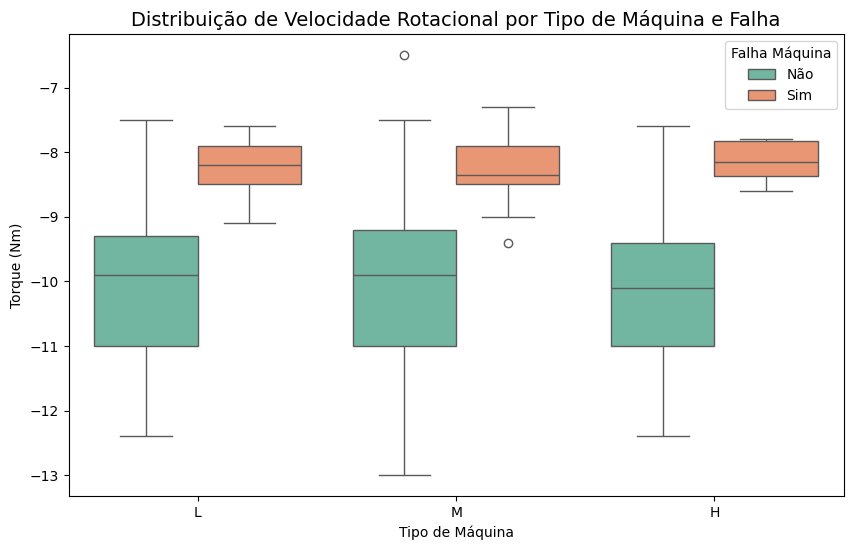

In [691]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(
    data=df,
    x="tipo",                # categoria (L/M/H)
    y="delta_temperatura",   # variável contínua
    hue="falha_dissipacao_calor",     # continua 0/1
    palette="Set2"
)

plt.title("Distribuição de Velocidade Rotacional por Tipo de Máquina e Falha", fontsize=14)
plt.xlabel("Tipo de Máquina")
plt.ylabel("Torque (Nm)")

# Ajusta legenda manualmente
handles, _ = ax.get_legend_handles_labels()
plt.legend(handles, ["Não", "Sim"], title="Falha Máquina")

plt.show()

In [ ]:
# Carregar dataset
df = pd.read_csv("meu_dataset_limpo.csv")

fig = px.box(
    df,
    x="tipo", 
    y="velocidade_rotacional",
    color="falha_maquina", 
    points="all",  # mostra também pontos individuais (pode trocar por "outliers")
    labels={
        "tipo": "Tipo de Máquina",
        "velocidade_rotacional": "Velocidade Rotacional (RPM)",
        "falha_maquina": "Falha Máquina"
    },
    title="Distribuição de Velocidade Rotacional por Tipo de Máquina e Falha"
)

# Ajustar legenda 0/1 para Não/Sim
fig.for_each_trace(lambda t: t.update(name = "Não" if t.name == "0" else "Sim"))

fig.show()

Tabela de contingência:
falha_maquina      0    1
tipo                     
H               1502   19
L              14002  226
M               5134   71

Resultado do teste Qui-Quadrado:
Qui² = 2.031
Graus de liberdade = 2
p-valor = 0.36216


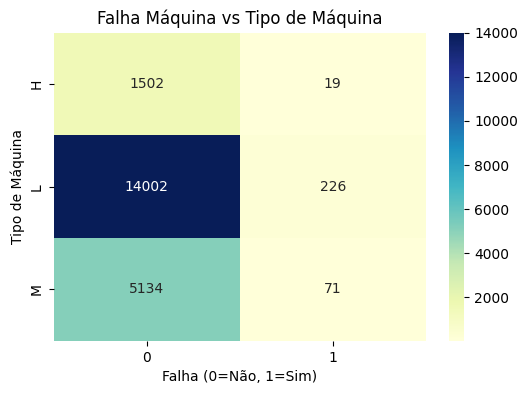

In [683]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# # Carregar dataset
# df = pd.read_csv("meu_dataset_limpo.csv")

# Criar tabela de contingência (cross-tab)
contingencia = pd.crosstab(df["tipo"], df["falha_maquina"])

print("Tabela de contingência:")
print(contingencia)

# Teste do qui-quadrado
chi2, p, dof, expected = chi2_contingency(contingencia)

print("\nResultado do teste Qui-Quadrado:")
print(f"Qui² = {chi2:.3f}")
print(f"Graus de liberdade = {dof}")
print(f"p-valor = {p:.5f}")

# Plotando o heatmap (valores observados)
plt.figure(figsize=(6,4))
sns.heatmap(contingencia, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Falha Máquina vs Tipo de Máquina")
plt.ylabel("Tipo de Máquina")
plt.xlabel("Falha (0=Não, 1=Sim)")
plt.show()


In [423]:
# Lista de falhas específicas
falhas = [
    "falha_desgaste_ferramenta",
    "falha_dissipacao_calor",
    "falha_potencia",
    "falha_tensao_excessiva",
    "falha_aleatoria"
]

resultados = []

for falha in falhas:
    # Criar tabela de contingência
    cont = pd.crosstab(df["tipo"], df[falha])
    chi2, p, dof, expected = chi2_contingency(cont)
    resultados.append({
        "Falha": falha,
        "Qui²": chi2,
        "GL": dof,
        "p-valor": p
    })

# Mostrar resultados em DataFrame
resultados_df = pd.DataFrame(resultados)
print(resultados_df)

                       Falha       Qui²  GL       p-valor
0  falha_desgaste_ferramenta   1.076944   2  5.836393e-01
1     falha_dissipacao_calor   1.121563   2  5.707628e-01
2             falha_potencia   6.020648   2  4.927572e-02
3     falha_tensao_excessiva  45.381254   2  1.398254e-10
4            falha_aleatoria   3.025950   2  2.202537e-01
